In [1]:
!python --version

Python 3.11.6


In [ ]:
%pip install whispercpp

In [5]:
from whispercpp import Whisper, utils, api

In [2]:
# utils.MODELS_URL

In [3]:
# monkey patching 
# import re 

# MODELS_URL_NEW = dict()

# for k in utils.MODELS_URL.keys():
#     MODELS_URL_NEW[k] = re.sub(r'datasets\/', '', utils.MODELS_URL[k])

# utils.MODELS_URL = MODELS_URL_NEW

In [4]:
# First init - download model

# params = (  # noqa # type: ignore
#     api.Params
#     .from_enum(api.SAMPLING_GREEDY)
#     #  .from_enum(api.SAMPLING_BEAM_SEARCH) # ValueError: allocator<T>::allocate(size_t n) 'n' exceeds maximum supported size
#     .with_print_progress(True)
#     .with_print_realtime(False)
#     .with_language('auto')
#     .build()
# )

# w = Whisper.from_pretrained("medium", basedir='/Users/Lev/dev/transcriber/models')
# w.from_params(params=params)

Models can be download ed with `./models/download-ggml-model.sh` script and placed to some dir which will be referenced as `base_dir` parameter 

In [6]:
# Second init - fast

from whispercpp import api

# params = api.Params()
api.Params.language ='ru'

# w = Whisper.from_pretrained("small")

params = (  # noqa # type: ignore
    api.Params
    .from_enum(api.SAMPLING_GREEDY)
    #  .from_enum(api.SAMPLING_BEAM_SEARCH) # ValueError: allocator<T>::allocate(size_t n) 'n' exceeds maximum supported size
    .with_print_progress(True)
    .with_print_realtime(False)
    .with_language('auto')
    .build()
)

w = Whisper.from_params('medium', params, basedir='models')

whisper_init_from_file_no_state: loading model from 'models/whispercpp/ggml-medium.bin'
whisper_model_load: loading model
whisper_model_load: n_vocab       = 51865
whisper_model_load: n_audio_ctx   = 1500
whisper_model_load: n_audio_state = 1024
whisper_model_load: n_audio_head  = 16
whisper_model_load: n_audio_layer = 24
whisper_model_load: n_text_ctx    = 448
whisper_model_load: n_text_state  = 1024
whisper_model_load: n_text_head   = 16
whisper_model_load: n_text_layer  = 24
whisper_model_load: n_mels        = 80
whisper_model_load: f16           = 1
whisper_model_load: type          = 4
whisper_model_load: mem required  = 1720.00 MB (+   43.00 MB per decoder)
whisper_model_load: adding 1608 extra tokens
whisper_model_load: model ctx     = 1462.35 MB
whisper_model_load: model size    = 1462.12 MB
whisper_init_state: kv self size  =   42.00 MB
whisper_init_state: kv cross size =  140.62 MB


In [20]:
%pip install ffmpeg-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 1.5 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492024 sha256=6fcd1ec93a4d83e9d918b2e6816019d4e06c63f56509fb920e94cd564755fd0a
  Stored in directory: /Users/Lev/Library/Caches/pip/wheels/5e/a9/47/f118e66afd12240e4662752cc22cefae5d97275623aa8ef57d
Successfully built future
Note: you may need to restart the kernel to use updated packages.


In [7]:
import ffmpeg
import numpy as np

input_file = '/Users/Lev/temp/source_iphone.m4a'
# vaw_file = '/Users/Lev/temp/platform_business_idea.wav'
sample_rate = '16000'

try:
    y, _ = (
        ffmpeg.input(input_file, threads=0)
        .output("-", format="s16le", acodec="pcm_s16le", ac=1, ar=sample_rate)
        .run(
            cmd=["ffmpeg", "-nostdin"], capture_stdout=True, capture_stderr=True
        )
    )
except ffmpeg.Error as e:
    raise RuntimeError(f"Failed to load audio: {e.stderr.decode()}") from e

arr = np.frombuffer(y, np.int16).flatten().astype(np.float32) / 32768.0

w.transcribe(arr)

whisper_full_with_state: auto-detected language: ru (p = 0.996185)
whisper_full_with_state: progress =   5%
whisper_full_with_state: progress =  10%
whisper_full_with_state: progress =  15%
whisper_full_with_state: progress =  20%
whisper_full_with_state: progress =  25%
whisper_full_with_state: progress =  30%
whisper_full_with_state: progress =  35%
whisper_full_with_state: progress =  40%
whisper_full_with_state: progress =  45%
whisper_full_with_state: progress =  50%
whisper_full_with_state: progress =  55%
whisper_full_with_state: progress =  60%
whisper_full_with_state: progress =  65%
whisper_full_with_state: progress =  70%
whisper_full_with_state: progress =  75%
whisper_full_with_state: progress =  80%
whisper_full_with_state: progress =  85%
whisper_full_with_state: progress =  90%
whisper_full_with_state: progress =  95%


' Идея бизнеса создания серийной ML Data Driven платформы, позволяющей в короткие сроки развернуть эту платформу и запустить процесс сбора данных, аналитики над ними, построение и применение ML модели. Сегменты рынка это большой бизнес и MSB, в большом бизнесе драйверы импортозамещения и безопасности, в MSB драйверы стартующей организации, которым быстро нужна экспертиза и решение по аналитике над данными и машинному обучению, такие как PULSE год назад. В большом бизнесе также еще интересные страты, такие как сельское хозяйство, например, где зрелость искусственного интеллекта низка, при этом явно есть решение, собреженные с применением искусственного интеллекта способные показать value, добавочную стоимость к их продукту. Про конкурентов. Есть конкуренты, такие как ARENA DATA, IT SUMA и прочие он-преми с платформы, я тут умышленное не беру cloud-платформу. Основной их недостаток это стоимость, устарелый стэк, сложность интеграция, то есть интеграция устанавливается долго, интеграция с

In [31]:
w.transcribe_from_file(vaw_file)

whisper_full_with_state: auto-detected language: ru (p = 0.991731)
whisper_full_with_state: progress =   5%
whisper_full_with_state: progress =  10%
whisper_full_with_state: progress =  15%
whisper_full_with_state: progress =  20%
whisper_full_with_state: progress =  25%
whisper_full_with_state: progress =  30%
whisper_full_with_state: progress =  35%
whisper_full_with_state: progress =  40%
whisper_full_with_state: progress =  45%
whisper_full_with_state: progress =  50%
whisper_full_with_state: progress =  55%
whisper_full_with_state: progress =  60%
whisper_full_with_state: progress =  65%
whisper_full_with_state: progress =  70%
whisper_full_with_state: progress =  75%
whisper_full_with_state: progress =  80%
whisper_full_with_state: progress =  85%
whisper_full_with_state: progress =  90%
whisper_full_with_state: progress =  95%


' Идея бизнеса. Создание серийной MLD, это древн платформы. Позволяющие в короткие сроки. Развернуть эту платформу. И запустить процесс споры данных. Аналитики над ними. Сегменты рынка. Это большой бизнес и MSB. В большом бизнесе драйверы. Стартующие организации. Быстро нужна экспертиза. Решение о аналитике над данными. Такие как пульс. Большом бизнесе. Интересные страты. Кооксельское хозяйство. Возьмите искусственные интеллекты. Есть решение. Сопрямление искусственных интеллектов. Вэлью. Добавочную стоимость. Про конкурентов. Есть конкуренты. Такие как арендато. Платформы. Стоимость. Старелый стэк. Сложность интеграции. Инсталляция. Инсталляция. Возможно модели применения. Фримиум. Монетизация. Фримиум. Интерпресс. Поддержки. Продажи. Понятие. И как сделать так. Экспертиза. По построению решений. Прикладная архитектурная. Сеть знакомств. Позволяю организовать команду. Стоимость. Продолжение. Исследование. Показать. Платформа. Долгое инсталляция. Драговизма. Больше уклон. Построение да

In [32]:
import ffmpeg

input_file = '/Users/Lev/Downloads/Третье\ Транспортное\ кольцо.m4a'
output_file = '/Users/Lev/temp/platform_business_idea_2.wav'

(
    ffmpeg
    .input(input_file)
    .output(output_file)
)

output(filename='/Users/Lev/temp/platform_business_idea_2.wav')[None] <18641d8122fd>

In [4]:
PRICE_GCP = {
    'cpu_sec': 0.00002400, 
    'mem_gib_sec': 0.00000250,
    'call': 0.40
}

AVG_DURATION = 20 * 60

DOL2RUB = 92

MONTH_LIMITS_GCP = {
    'cpu': 180_000, 
    'mem': 360_000,
    'calls': 2_000_000
}

# BASE_PRICE = 399

# ABON_RUB = {
#     10: BASE_PRICE, 
#     20: BASE_PRICE * 2 * .98,
#     50:  BASE_PRICE * 5 * 0.95,
#     100: BASE_PRICE * 100 * 0.85
# }

# ABON_RUB


In [10]:
clients_count = 300_000
call_per_client = 10

total_call_count = clients_count * call_per_client

print(f'Total call count: {total_call_count:_}')

cpu_cost =  (
    (total_call_count * AVG_DURATION - MONTH_LIMITS_GCP['cpu']) * PRICE_GCP['cpu_sec'] 
    if total_call_count * AVG_DURATION > MONTH_LIMITS_GCP['cpu'] 
    else 0
)

MEM_COEFF = 2

mem_cost = (
    (total_call_count * AVG_DURATION * MEM_COEFF - MONTH_LIMITS_GCP['mem']) * PRICE_GCP['mem_gib_sec']
    if total_call_count * AVG_DURATION * MEM_COEFF > MONTH_LIMITS_GCP['mem']
    else 0
)

calls_cost = (
    (total_call_count - MONTH_LIMITS_GCP['calls']) * PRICE_GCP['call']
    if total_call_count > MONTH_LIMITS_GCP['calls']
    else 0
)

total_cost = cpu_cost + mem_cost + calls_cost

print (f'CPU cost: {cpu_cost:_} \nMEM cost: {mem_cost:_} \nCALLS cost: {calls_cost:_} \nTOTAL cost: {total_cost:_}')

total_cost_rub = total_cost * DOL2RUB
print(f'Total cost RUB: {total_cost_rub:_}')

total_income_rub = Pricing.pricing_detail[call_per_client] * clients_count
margin_rub = Pricing.pricing_detail[call_per_client] * clients_count - total_cost_rub

print(f'Total income RUB: {total_income_rub:_} \nMargin RUB: {margin_rub:_}')

Total call count: 3_000_000
CPU cost: 86_395.68000000001 
MEM cost: 17_999.100000000002 
CALLS cost: 400_000.0 
TOTAL cost: 504_394.78
Total cost RUB: 46_404_319.760000005
Total income RUB: 14_700_000 
Margin RUB: -31_704_319.760000005


In [1]:
from billing import Pricing

print(Pricing.pricing_detail)

{10: 199, 20: 399, 50: 899, 'Unlim': 1699}


In [2]:
# Calc margin params 

def get_margin(clients_count, call_per_client):

    total_call_count = clients_count * call_per_client

    cpu_cost =  (
        (total_call_count * AVG_DURATION - MONTH_LIMITS_GCP['cpu']) * PRICE_GCP['cpu_sec'] 
        if total_call_count * AVG_DURATION > MONTH_LIMITS_GCP['cpu'] 
        else 0
    )

    MEM_COEFF = 2

    mem_cost = (
        (total_call_count * AVG_DURATION * MEM_COEFF - MONTH_LIMITS_GCP['mem']) * PRICE_GCP['mem_gib_sec']
        if total_call_count * AVG_DURATION * MEM_COEFF > MONTH_LIMITS_GCP['mem']
        else 0
    )

    calls_cost = (
        (total_call_count - MONTH_LIMITS_GCP['calls']) * PRICE_GCP['call']
        if total_call_count > MONTH_LIMITS_GCP['calls']
        else 0
    )

    total_cost = cpu_cost + mem_cost + calls_cost
    total_cost_rub = total_cost * DOL2RUB

    total_income_rub = Pricing.pricing_detail[call_per_client] * clients_count
    margin_rub = Pricing.pricing_detail[call_per_client] * clients_count - total_cost_rub

    return margin_rub, total_income_rub, total_cost_rub, total_call_count

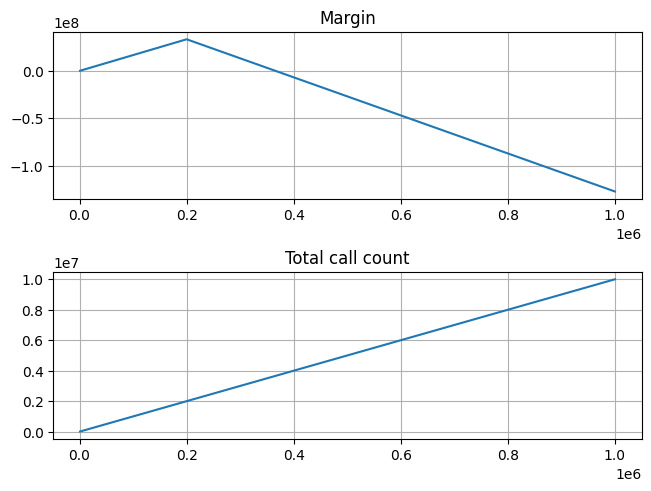

In [7]:
from matplotlib import pyplot as plt

# client_counts_x = [1_000, 10_000, 50_000, 100_000, 120_000]

client_counts_x = [1_000, 10_000, 50_000, 100_000, 150_000, 200_000, 250_000, 300_000, 400_000, 500_000, 600_000, 700_000, 800_000, 1000_000]

calls_abon = 10

fin_vals = [get_margin(x, calls_abon) for x  in client_counts_x]
margins = [val[0] for val  in fin_vals]
call_counts = [val[3] for val  in fin_vals]

# margins

fig, axs = plt.subplots(2, 1, constrained_layout=True)
# ax.ticklabel_format(useOffset=False)
axs[0].plot(client_counts_x, margins)
axs[0].set_title('Margin')
axs[0].grid(True)
axs[1].plot(client_counts_x, call_counts)
axs[1].set_title('Total call count')
axs[1].grid(True)

## GCP Bucket

In [8]:
bucket_path = 'transcriber-audiofiles'

In [9]:
%pip install google-cloud-storage

Note: you may need to restart the kernel to use updated packages.


In [12]:
# https://stackoverflow.com/questions/41460802/accessing-data-in-google-cloud-bucket-for-a-python-tensorflow-learning-program

from google.cloud import storage

client = storage.Client()
bucket = client.get_bucket(bucket_path)

# Then do other things...
# blob = bucket.get_blob('remote/path/to/file.txt')
# print(blob.download_as_string())

# blob.upload_from_string('New contents!')
blob2 = bucket.blob('source_iphone.m4a')

blob2.upload_from_filename(filename='/Users/Lev/temp/source_iphone.m4a', timeout=9999999)

In [27]:
v = 3*1e6
print(f'{v:_}')

3_000_000.0
